<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_Architecture_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple hold-out validation - Second CNN model **

Finding the best model without Data Aug, Drop out, Normalizaiton techniques.



**There is evident case of overfitting, but accuracy is higher than previous version.**

[Previous model](https://github.com/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_Architecture_v1.ipynb)  ```validation accuracy: 63.65%```

```This model validation accuracy: 71.54%```




**Loading the CIFAR10 set**

In [2]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


**Preparing data**

Training/Validation 80%/20%


In [3]:
import sklearn.model_selection as skl 

train_images, val_images, train_labels, val_labels = skl.train_test_split(train_images, train_labels, test_size=0.20)

print("train images",train_images.shape)
print("val images",val_images.shape)

train images (40000, 32, 32, 3)
val images (10000, 32, 32, 3)


**Preprocess the data**

In [0]:
from keras.utils import to_categorical

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

**The Architecture**

In [5]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flat

**Compiling the model**

In [0]:
import keras
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

**Training the network**

In [7]:
history = model.fit(train_images,
          train_labels,
          batch_size=128,
          epochs = 50,
          validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 9s 221us/step - loss: 1.7959 - acc: 0.3514 - val_loss: 1.5431 - val_acc: 0.4514
Epoch 2/50
40000/40000 [==============================] - 7s 176us/step - loss: 1.4758 - acc: 0.4739 - val_loss: 1.3417 - val_acc: 0.5188
Epoch 3/50
40000/40000 [==============================] - 7s 175us/step - loss: 1.3148 - acc: 0.5363 - val_loss: 1.2316 - val_acc: 0.5700
Epoch 4/50
40000/40000 [==============================] - 7s 176us/step - loss: 1.2021 - acc: 0.5809 - val_loss: 1.2027 - val_acc: 0.5622
Epoch 5/50
40000/40000 [==============================] - 7s 175us/step - loss: 1.1085 - acc: 0.6152 - val_loss: 1.0781 - val_acc: 0.6177
Epoch 6/50
40000/40000 [==============================] - 7s 175us/step - loss: 1.0309 - acc: 0.6452 - val_loss: 1.0674 - val_acc: 0.6282
Epoch 7/50
40000/40000 [==============================] - 7s 176us/step - 

**Plotting the model**

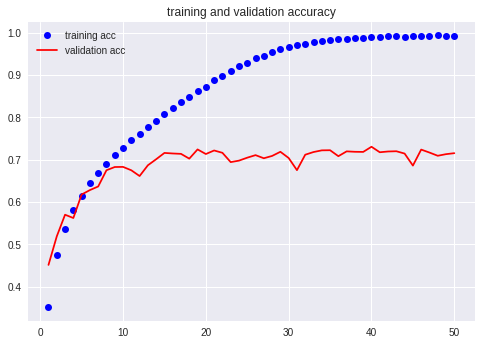

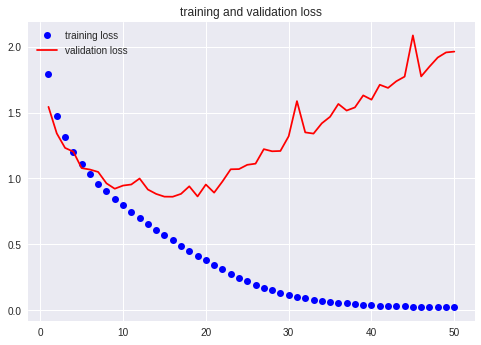

In [8]:
#@title
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', 
         label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')

plt.legend()

plt.show()

**Evaluate the model with validation set**



In [9]:

score = model.evaluate(val_images, val_labels, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1]*100,"%")

Validation loss: 1.9626147029876708
Validation accuracy: 71.54 %
